# Gaussian mode - Transverse displacement

In [1]:
import os
import sys
sys.path.append('../QScatter')
import QScatter
from QScatter import *

In [2]:
a0lst = np.arange(0.5,12.5,0.5)

files_electrons = glob.glob('PW/a*-electrons-*103.h5')
files_electrons.sort()

enelst = np.linspace(1,5000,200)
enedist_electrons = np.zeros((len(files_electrons),len(enelst)-1))
enedist_photons = np.zeros_like(enedist_electrons)

for i in range(len(files_electrons)):
    filef = h5py.File(files_electrons[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])*-1

    enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
    enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
    enedist_electrons[i,:] = enedist_sim_y1
    
files = glob.glob('PW/a*-photons-*103.h5')
files.sort()
for i in range(len(files)):
    filef = h5py.File(files[i], 'r')
    enedist = np.array(filef['ene'])
    #print(np.max(enedist))
    qdist = np.array(filef['q'])

    enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
    enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
    enedist_photons[i,:] = enedist_sim_y1

In [3]:
# parameters
# laser
lbd = 0.8; #[\mu m]
a0 = 12 #[]
W0 = 2.4; #[\mu m]
zR = pi*W0**2/lbd; #[\mu m]

# beam
g0 = 5000; #[]
R = W0; #[\mu m]

def dNda(a,dprp):
    return (W0/R)**2 / a * ( (a/a0)**((W0/R)**2) ) * iv(0,2*dprp*W0/R**2 * sqrt(log(a0/a))) * exp(-(dprp/R)**2);

a0lst = np.arange(0.2,12.1,0.2)
dNda0 = np.array([dNda(a,0) for a in a0lst])
dNda1 = np.array([dNda(a,R/sqrt(2)) for a in a0lst])
dNda2 = np.array([dNda(a,2*R/sqrt(2)) for a in a0lst])
dNda3 = np.array([dNda(a,3*R/sqrt(2)) for a in a0lst])

dNda0 = dNda0/np.trapz(dNda0,a0lst)
dNda1 = dNda1/np.trapz(dNda1,a0lst)
dNda2 = dNda2/np.trapz(dNda2,a0lst)
dNda3 = dNda3/np.trapz(dNda3,a0lst)

#
# electrons
dNdg = np.zeros(len(enelst)-1)
for i in range(len(files_electrons)):
    dNdg = dNdg + dNda0[i] * enedist_electrons[i,:]
dNdg0 = dNdg#/np.trapz(dNda0,a0lst)

dNdg = np.zeros(len(enelst)-1)
for i in range(len(files_electrons)):
    dNdg = dNdg + dNda1[i] * enedist_electrons[i,:]
dNdg1 = dNdg#/np.trapz(dNda1,a0lst)

dNdg = np.zeros(len(enelst)-1)
for i in range(len(files_electrons)):
    dNdg = dNdg + dNda2[i] * enedist_electrons[i,:]
dNdg2 = dNdg#/np.trapz(dNda2,a0lst)

dNdg = np.zeros(len(enelst)-1)
for i in range(len(files_electrons)):
    dNdg = dNdg + dNda3[i] * enedist_electrons[i,:]
dNdg3 = dNdg#/np.trapz(dNda3,a0lst)

# photons
dNdg = np.zeros(len(enelst)-1)
for i in range(len(files_electrons)):
    dNdg = dNdg + dNda0[i] * enedist_photons[i,:]
dNdg0g = dNdg#/np.trapz(dNda0,a0lst)

dNdg = np.zeros(len(enelst)-1)
for i in range(len(files_electrons)):
    dNdg = dNdg + dNda1[i] * enedist_photons[i,:]
dNdg1g = dNdg#/np.trapz(dNda1,a0lst)

dNdg = np.zeros(len(enelst)-1)
for i in range(len(files_electrons)):
    dNdg = dNdg + dNda2[i] * enedist_photons[i,:]
dNdg2g = dNdg#/np.trapz(dNda2,a0lst)

dNdg = np.zeros(len(enelst)-1)
for i in range(len(files_electrons)):
    dNdg = dNdg + dNda3[i] * enedist_photons[i,:]
dNdg3g = dNdg #/np.trapz(dNda3,a0lst)

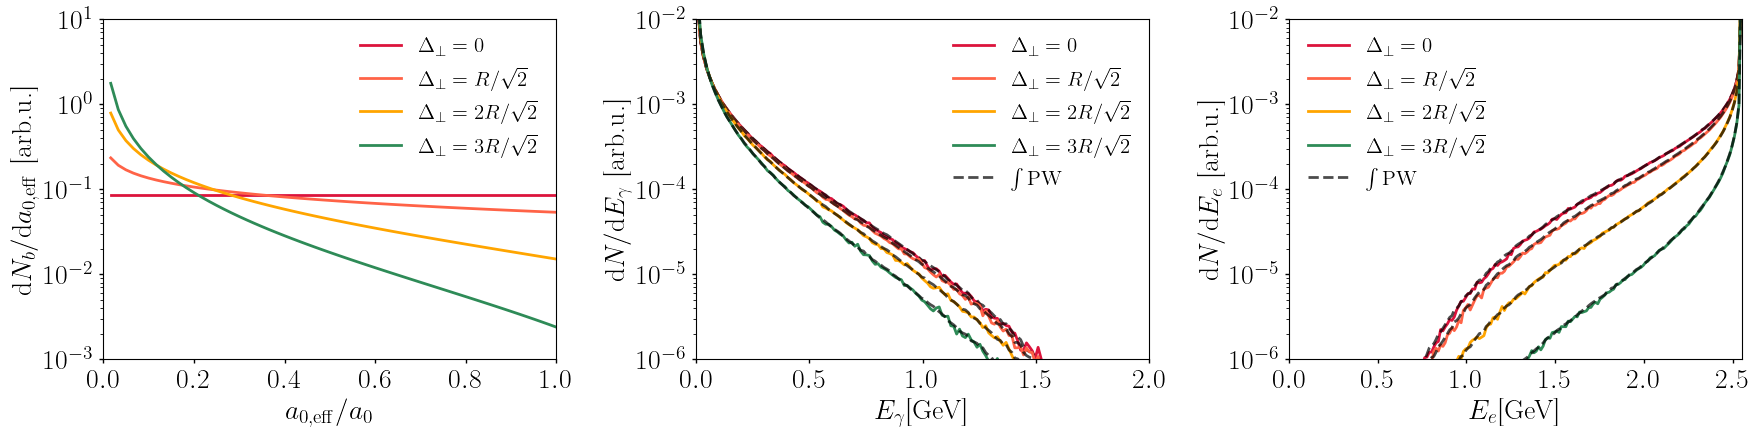

In [5]:
# plot 
plt.style.use("../reduQED/style.txt")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,4.7))

axes[0].plot(a0lst/a0, dNda0/np.trapz(dNda0,a0lst), label=r'$\Delta_\bot=0$')
axes[0].plot(a0lst/a0, dNda1/np.trapz(dNda1,a0lst), label=r'$\Delta_\bot=R/\sqrt 2$')
axes[0].plot(a0lst/a0, dNda2/np.trapz(dNda2,a0lst), label=r'$\Delta_\bot=2R/\sqrt 2$')
axes[0].plot(a0lst/a0, dNda3/np.trapz(dNda3,a0lst), label=r'$\Delta_\bot=3R/\sqrt 2$')
axes[0].legend(loc='upper right', frameon=False)
axes[0].set_xlabel(r'$a_{0,\mathrm{eff}}/a_0$')
axes[0].set_ylabel(r'$\mathrm{d}N_b/\mathrm{d}a_{0,\mathrm{eff}}$ [arb.u.]')
axes[0].set_xticks([0,0.2,0.4,0.6,0.8,1.0])
axes[0].set_ylim([1e-3,1e1])
axes[0].set_yscale('log')
#axes[0].set_title(r'Short beam: $\lambda=0.8~\mu\mathrm{m},W_0=R=2.4~\mu\mathrm{m}$')
# aspect
xmin, xmax = axes[0].get_xlim()
ymin, ymax = axes[0].get_ylim()
#axesratio = (ymax-ymin)/(xmax-xmin)
axesratio = (np.log10(ymax)-np.log10(ymin))/(xmax-xmin)
axes[0].set_aspect(aspect=3/4/axesratio)

### electrons
dNdgscale = 0.8
filef = h5py.File('GaussianDeltaPrp/deltaprp_RW1_dR0_RAW-electrons-000060.h5', 'r')
enedist = np.array(filef['ene'])
qdist = np.abs(np.array(filef['q']))
enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
axes[2].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1/np.trapz(enedist_sim_y1,enedist_sim_x), label=r'$\Delta_\bot=0$'  )
axes[2].plot(enedist_sim_x*(0.511e6)*1e-9, dNdg0/np.trapz(dNdg0,enedist_sim_x), 'k--', alpha=0.7)
#
filef = h5py.File('GaussianDeltaPrp/deltaprp_RW1_dR1_RAW-electrons-000060.h5', 'r')
enedist = np.array(filef['ene'])
qdist = np.abs(np.array(filef['q']))
enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
axes[2].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1/np.trapz(enedist_sim_y1,enedist_sim_x), label=r'$\Delta_\bot=R/\sqrt 2$'  )
axes[2].plot(enedist_sim_x*(0.511e6)*1e-9, dNdg1/np.trapz(dNdg1,enedist_sim_x), 'k--', alpha=0.7)
#
filef = h5py.File('GaussianDeltaPrp/deltaprp_RW1_dR2_RAW-electrons-000060.h5', 'r')
enedist = np.array(filef['ene'])
qdist = np.abs(np.array(filef['q']))
enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
axes[2].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1/np.trapz(enedist_sim_y1,enedist_sim_x), label=r'$\Delta_\bot=2R/\sqrt 2$'  )
axes[2].plot(enedist_sim_x*(0.511e6)*1e-9, dNdg2/np.trapz(dNdg2,enedist_sim_x)/1.2, 'k--', alpha=0.7)
#
filef = h5py.File('GaussianDeltaPrp/deltaprp_RW1_dR3_RAW-electrons-000060.h5', 'r')
enedist = np.array(filef['ene'])
qdist = np.abs(np.array(filef['q']))
enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
axes[2].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1/np.trapz(enedist_sim_y1,enedist_sim_x), label=r'$\Delta_\bot=3R/\sqrt 2$'  )
axes[2].plot(enedist_sim_x*(0.511e6)*1e-9, dNdg3/np.trapz(dNdg3,enedist_sim_x)/2, 'k--', alpha=0.7, label=r'$\int \mathrm{PW}$')
#
axes[2].set_yscale('log')
axes[2].legend(loc='upper left', frameon=False)
axes[2].set_xlim([0,5000*(0.511e6)*1e-9])
axes[2].set_ylim([1e-6,1e-2])
axes[2].set_xlabel(r'$E_e$[GeV]')
axes[2].set_ylabel(r'$\mathrm{d}N/\mathrm{d}E_e$ [arb.u.]')
axes[2].set_xticks([0,0.5,1,1.5,2,2.5])
#plt.title(r'G: $\gamma_e=5000, \lambda=0.8~\mu\mathrm{m}, \tau_\mathrm{rise} = 50~\omega_p^{-1} $')
# aspect
xmin, xmax = axes[2].get_xlim()
ymin, ymax = axes[2].get_ylim()
#axesratio = (ymax-ymin)/(xmax-xmin)
axesratio = (np.log10(ymax)-np.log10(ymin))/(xmax-xmin)
axes[2].set_aspect(aspect=3/4/axesratio)


### photons
dNdgscale = 0.8
#
filef = h5py.File('GaussianDeltaPrp/deltaprp_RW1_dR0_RAW-photons-000060.h5', 'r')
enedist = np.array(filef['ene'])
qdist = np.abs(np.array(filef['q']))
enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1/np.trapz(enedist_sim_y1,enedist_sim_x), label=r'$\Delta_\bot=0$'  )
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, dNdg0g/np.trapz(dNdg0g,enedist_sim_x), 'k--', alpha=0.7)
#
filef = h5py.File('GaussianDeltaPrp/deltaprp_RW1_dR1_RAW-photons-000060.h5', 'r')
enedist = np.array(filef['ene'])
qdist = np.abs(np.array(filef['q']))
enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1/np.trapz(enedist_sim_y1,enedist_sim_x), label=r'$\Delta_\bot=R/\sqrt 2$'  )
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, dNdg1g/np.trapz(dNdg1g,enedist_sim_x), 'k--', alpha=0.7)
#
filef = h5py.File('GaussianDeltaPrp/deltaprp_RW1_dR2_RAW-photons-000060.h5', 'r')
enedist = np.array(filef['ene'])
qdist = np.abs(np.array(filef['q']))
enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1/np.trapz(enedist_sim_y1,enedist_sim_x), label=r'$\Delta_\bot=2R/\sqrt 2$'  )
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, dNdg2g/np.trapz(dNdg2g,enedist_sim_x), 'k--', alpha=0.7)
#
filef = h5py.File('GaussianDeltaPrp/deltaprp_RW1_dR3_RAW-photons-000060.h5', 'r')
enedist = np.array(filef['ene'])
qdist = np.abs(np.array(filef['q']))
enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1/np.trapz(enedist_sim_y1,enedist_sim_x), label=r'$\Delta_\bot=3R/\sqrt 2$'  )
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, dNdg3g/np.trapz(dNdg3g,enedist_sim_x), 'k--', alpha=0.7, label=r'$\int \mathrm{PW}$')
#
axes[1].set_yscale('log')
axes[1].legend(loc='upper right', frameon=False)
axes[1].set_xlim([0,5000*(0.511e6)*1e-9])
axes[1].set_ylim([1e-6,1e-2])
axes[1].set_xlabel(r'$E_\gamma$[GeV]')
axes[1].set_ylabel(r'$\mathrm{d}N/\mathrm{d}E_\gamma$ [arb.u.]')
axes[1].set_xlim([0,2])
#axes[1].set_xticks([0,0.5,1,1.5,2,2.5])
#axes[2].title(r'G: $\gamma_e=5000, \lambda=0.8~\mu\mathrm{m}, \tau_\mathrm{rise} = 50~\omega_p^{-1} $')
# aspect
xmin, xmax = axes[1].get_xlim()
ymin, ymax = axes[1].get_ylim()
#axesratio = (ymax-ymin)/(xmax-xmin)
axesratio = (np.log10(ymax)-np.log10(ymin))/(xmax-xmin)
axes[1].set_aspect(aspect=3/4/axesratio)

plt.tight_layout()
plt.savefig('GaussianDeltaPrp.pdf',transparent=True)
plt.show()